In [1]:
#import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key
from scipy.stats import linregress

In [2]:
# create an empty list to hold the weather data
city_data = []
#print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [3]:
#create basic URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [5]:
# add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
#use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [7]:
#Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [8]:
#loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | palmer
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | beloha
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | duluth
Processing Record 9 of Set 1 | boca do acre
Processing Record 10 of Set 1 | griffith
Processing Record 11 of Set 1 | kaduqli
Processing Record 12 of Set 1 | rawson
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | bardiyah
Processing Record 15 of Set 1 | zyryanka
Processing Record 16 of Set 1 | itaqui
Processing Record 17 of Set 1 | camacha
Processing Record 18 of Set 1 | shar
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | les cayes
Processing Record 23 of Set 1 | nuzvid
Processing Record 24 of Set 1 | luwingu
Processin

Processing Record 37 of Set 4 | lata
Processing Record 38 of Set 4 | morro bay
Processing Record 39 of Set 4 | turukhansk
Processing Record 40 of Set 4 | santa maria
Processing Record 41 of Set 4 | flinders
Processing Record 42 of Set 4 | sechura
Processing Record 43 of Set 4 | souris
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | llata
Processing Record 46 of Set 4 | grand centre
City not found. Skipping...
Processing Record 47 of Set 4 | kampene
Processing Record 48 of Set 4 | port elizabeth
Processing Record 49 of Set 4 | khonuu
City not found. Skipping...
Processing Record 50 of Set 4 | lagoa
Processing Record 1 of Set 5 | bereda
Processing Record 2 of Set 5 | tuggurt
City not found. Skipping...
Processing Record 3 of Set 5 | berea
Processing Record 4 of Set 5 | ode
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | esperance
Processing Record 8 of Set 5 | kabarnet
Processing Record 9 of Set 5 | sumbe

Processing Record 27 of Set 8 | sept-iles
Processing Record 28 of Set 8 | tunggol
Processing Record 29 of Set 8 | sunndalsora
Processing Record 30 of Set 8 | tautira
Processing Record 31 of Set 8 | itarema
Processing Record 32 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 33 of Set 8 | la macarena
Processing Record 34 of Set 8 | bubaque
Processing Record 35 of Set 8 | salvador
Processing Record 36 of Set 8 | yabrud
Processing Record 37 of Set 8 | marzuq
Processing Record 38 of Set 8 | marsh harbour
Processing Record 39 of Set 8 | sinkat
City not found. Skipping...
Processing Record 40 of Set 8 | riverton
Processing Record 41 of Set 8 | cherskiy
Processing Record 42 of Set 8 | hami
Processing Record 43 of Set 8 | huesca
Processing Record 44 of Set 8 | arlit
Processing Record 45 of Set 8 | harper
Processing Record 46 of Set 8 | baghdad
Processing Record 47 of Set 8 | nampula
Processing Record 48 of Set 8 | batemans bay
Processing Record 49 of Set 8 | cap malheureux


Processing Record 13 of Set 12 | valleyview
Processing Record 14 of Set 12 | birobidzhan
Processing Record 15 of Set 12 | husavik
Processing Record 16 of Set 12 | kushmurun
Processing Record 17 of Set 12 | khandyga
Processing Record 18 of Set 12 | ukiah
Processing Record 19 of Set 12 | ahipara
Processing Record 20 of Set 12 | wilmington
Processing Record 21 of Set 12 | tucuman
Processing Record 22 of Set 12 | nanakuli
Processing Record 23 of Set 12 | giyon
Processing Record 24 of Set 12 | vestmannaeyjar
Processing Record 25 of Set 12 | port hardy
Processing Record 26 of Set 12 | paamiut
Processing Record 27 of Set 12 | mao
Processing Record 28 of Set 12 | kharp
Processing Record 29 of Set 12 | tsagan aman
Processing Record 30 of Set 12 | baza
Processing Record 31 of Set 12 | elko
Processing Record 32 of Set 12 | lasa
Processing Record 33 of Set 12 | el badari
City not found. Skipping...
Processing Record 34 of Set 12 | chadiza
Processing Record 35 of Set 12 | tashtagol
Processing Recor

In [9]:
#convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,51.46,46,0,18.41,AR,2021-10-30 22:58:49
1,Palmer,42.1584,-72.3287,58.98,86,90,1.01,US,2021-10-30 22:58:49
2,Mount Gambier,-37.8333,140.7667,51.71,82,40,11.50,AU,2021-10-30 22:58:50
3,Beloha,-25.1667,45.0500,67.01,86,60,11.25,MG,2021-10-30 22:58:50
4,Hobart,-42.8794,147.3294,60.03,55,75,3.00,AU,2021-10-30 22:54:36
5,Albany,42.6001,-73.9662,57.38,92,95,2.44,US,2021-10-30 22:58:50
6,Duluth,46.7833,-92.1066,50.59,79,1,1.01,US,2021-10-30 22:58:50
7,Boca Do Acre,-8.7522,-67.3978,82.38,59,83,2.39,BR,2021-10-30 22:58:51
8,Griffith,41.5284,-87.4237,57.40,80,1,1.01,US,2021-10-30 22:58:51
9,Kaduqli,11.0167,29.7167,81.75,49,70,3.69,SD,2021-10-30 22:58:51


In [10]:
#create the output file (csv)
output_data_file = "weather_data/cities.csv"
#export the City_Data inot a CSV
city_data_df.to_csv(output_data_file, index_label="city_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
#get today's date in seconds
today = time.time()
today

1635635184.8859346

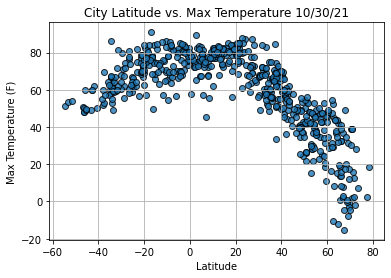

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

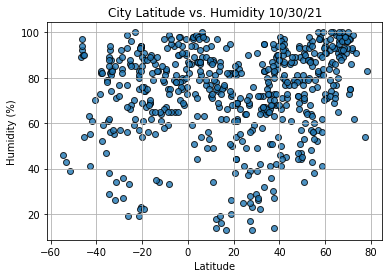

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

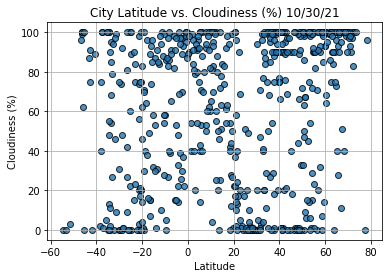

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

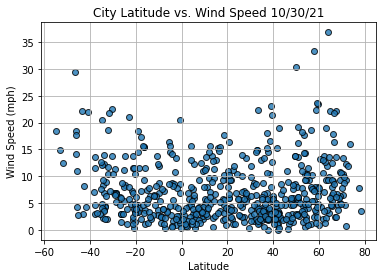

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()